# Homework 1

### Question 1

#### Speed Test

##### Using ClpSolver()

In [61]:
using JuMP, Clp,ECOS, SCS


m = Model()

@variable(m, 0 <= x1 <= 3)
@variable(m, 0 <= x2 <= 3)
@variable(m, 0 <= x3 <= 3)
@constraint(m, 2x1 - x2 - x3 >= 0)
@objective(m, Max, 5x1 - x2 + 11x3)


setsolver(m, ClpSolver())
@time(for i in 1:10000
        solve(m)
    end)

println("value of x1 = ", getvalue(x1))
println("value of x2 = ", getvalue(x2))
println("value of x3 = ", getvalue(x3))
println("Optimal value of objective function = ", getobjectivevalue(m))

  1.209625 seconds (360.03 k allocations: 24.112 MiB, 0.42% gc time)
value of x1 = 3.0
value of x2 = 0.0
value of x3 = 3.0
Optimal value of objective function = 48.0


##### Using ECOSSolver()

In [62]:
setsolver(m, ECOSSolver(verbose = 0))
@time(for i in 1:10000
         solve(m)
    end)
    

println("value of x1 = ", getvalue(x1))
println("value of x2 = ", getvalue(x2))
println("value of x3 = ", getvalue(x3))
println("Optimal value of objective function = ", getobjectivevalue(m))

  1.667427 seconds (4.89 M allocations: 279.090 MiB, 4.24% gc time)
value of x1 = 2.999999998571697
value of x2 = 8.223270011736391e-9
value of x3 = 3.0000000001977236
Optimal value of objective function = 47.999999986810174


##### Using SCSSolver()

In [63]:
setsolver(m, SCSSolver(verbose = 0))
@time(for i in 1:10000
         solve(m)
    end)


println("value of x1 = ", getvalue(x1))
println("value of x2 = ", getvalue(x2))
println("value of x3 = ", getvalue(x3))
println("Optimal value of objective function = ", getobjectivevalue(m))

  1.818546 seconds (3.93 M allocations: 228.582 MiB, 2.87% gc time)
value of x1 = 2.999985652990818
value of x2 = 4.149724928776938e-6
value of x3 = 3.0000130627112176
Optimal value of objective function = 48.00006780505256


#### Accuracy Test

In [64]:
vals = []
for x in 0:3
    for y in 0:3
        for z in 0:3
            if 2x - y - z >= 0
                push!(vals, [x,y,z])
            end
        end
    end
end



vals2 = []
max = 0
max_values = 0
for i in 1:length(vals)
    values = vals[i]
    if 5*values[1] - values[2] + 11*values[3] > max
        max = 5*values[1] - values[2] + 11*values[3]
        max_values = values
    end
end



println("maximum value thorugh manual method = ", max)
println("value of x1 = ", max_values[1])
println("value of x2 = ", max_values[2])
println("value of x3 = ", max_values[3])

maximum value thorugh manual method = 48
value of x1 = 3
value of x2 = 0
value of x3 = 3


#### Analysis of Speed and Accuracy

* We can see that the solvers are in increasing order of speeds : Clp < ECOS < SCS. This is because the ECOS and SCS solvers reduce the problem into an LP. Since the solvers increase in terms of generality in the order : Clp, ECOS, SCS. We must expect them to perform slower as the generality increases.
* Upon solving the same LP manually, we notice that we obtain exact solutions for the maximum optimal value and the values of x1, x2, x3 which perfectly match the values obtained by the ClpSolver(). Hence, ClpSolver() is the more accurate for this problem. After Clp, we notice that ECOS and SCS are less accurate in that order.



### Question 2

Let w be the number of acres of land allocated for wheat crops
Let c be the number of acres of land allocated for corn crops

Then the following constraints apply
* 3w + 2c <= 100 
* 2w + 4c <= 120
* w + c = 45
* 0 <= w <= 45
* 0 <= c <= 45

The equation to maximize will be 
* p = 200w + 300c

##### Part (a)

In [72]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, 0 <= w <= 45) # acres of land for wheat
@variable(m, 0 <= c <= 45) # acres of land for corn
@constraint(m, 3w + 2c <= 100) # number of workers
@constraint(m, 2w + 4c <= 120) # tons of fertilizer
@constraint(m, w + c <= 45) # acres of land
@objective(m, Max, 200w + 300c)

status = solve(m)

println(status)
println("Allocate ", getvalue(w)," acres of wheat")
println("Allocate ",getvalue(c)," acres of corn")
println("Total profit is \$", getobjectivevalue(m))


Optimal
Allocate 19.99999999999999 acres of wheat
Allocate 20.000000000000007 acres of corn
Total profit is $10000.0


##### Part (b)

In [69]:
# list the crops
crops = [":wheat", ":corn"]

# list the requirements to tend to a single acre 
reqs = [":labor",":fertilizer", ":land_acres"]

# profit
profit = Dict(zip(crops, [200,300]))

# quantities
quant_avail = Dict(zip(reqs, [100, 120, 45]))

# materials
using NamedArrays
materials_mat = [ 3 2 1
                  2 4 1 ]
materials = NamedArray(materials_mat, (crops, reqs), ("crop","req"))
;

In [70]:
using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, acres[crops] >= 0)
@expression(m, total_profit, sum(profit[s]*acres[s] for s in crops))
    @constraint(m, constr[i in reqs], sum(materials[s,i]*acres[s] for s in crops) <= quant_avail[i] )
@objective(m, Max, total_profit)
        
solve(m)
println(getvalue(acres))
println("Total profit is: \$", getvalue(total_profit))

acres: 1 dimensions:
[:wheat] = 19.99999999999999
[ :corn] = 20.000000000000007
Total profit is: $10000.0


##### Part (c)

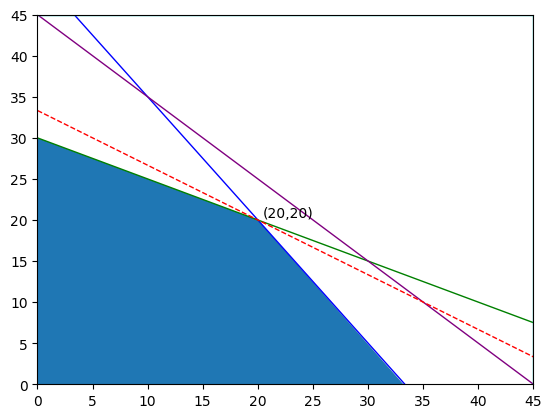

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x7fa09a45e550>

In [36]:
using PyPlot

w = linspace(0,45)
c = (100/2) - (3/2)w
plot(w,c,"b-", linewidth = 1)
c = (120/4) - (2/4)w
plot(w,c,"g-", linewidth = 1)
c = 45 - w
plot(w,c,"purple", linewidth = 1)
plot([45 for i in 0:45],0:45 , "c-", linewidth = 1)
plot(0:45, [45 for i in 0:45] , "c-", linewidth = 1)
xlim((0,45))
ylim((0,45))

c = (10000/300) - (200/300)w
plot(w,c,"r--", linewidth = 1)

text(20.4,20.4,"(20,20)",fontsize = 10)

x = [0,0,20,33.2,0]
y = [0,30,20,0,0]
fill(x,y)

When we substitute the optimal value of profit as calculated by the ClpSolver(), we find that the line describing the profit function 10000 = 200w + 300c passes through the point (20,20). The values of x and y at this point give us the optimal value of the number of acres of wheat and corn to grow. We notice that these values correspond to the values obtained by solving the same LP using ClpSolver()